In [65]:
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

We want to solve:

$$
-\nabla \cdot (q(u)\nabla u) = f
$$

Here, the coefficient $q(u)$ makes the equation nonlinear.

Applying the identity: $\nabla \cdot(uv) = (\nabla u) v + u\cdot \nabla v$
$$
-\int_{\Omega} (\nabla \cdot (q(u)\nabla u)) v\,\mathrm{d}x = \int_{\Omega} (q(u)\nabla u) \cdot \nabla v \, \mathrm{d} x - \int_{\Omega} \nabla\cdot (q(u)\nabla u) v \,\mathrm{d}x=  \int_{\Omega} f v\,\mathrm{d}x
$$
Divergence theorem:
$$
-\int_{\Omega} (\nabla \cdot (q(u)\nabla u)) v\,\mathrm{d}x = \int_{\Omega} (q(u)\nabla u) \cdot \nabla v \, \mathrm{d} x - \int_{\partial \Omega} \mathrm{n}\cdot (q(u)\nabla u) v \,\mathrm{d}s
$$
Weak form:
$$
\forall v \in \partial\Omega, v = 0 \longrightarrow \int_{\Omega} (q(u)\nabla u) \cdot \nabla v \,\mathrm{d}x = \int_{\Omega} f v\,\mathrm{d}x   
$$
$$
F(u, v) = \int_{\Omega} (q(u)\nabla u \cdot \nabla v - fv)\,\mathrm{d}x
$$
Variational:
$$
a(u,v) = L(v)
$$
$$
a(u,v) = \int_{\Omega} (q(u)\nabla u) \cdot \nabla v \,\mathrm{d}x
$$
$$
L(u,v) = \int_{\Omega} f v\,\mathrm{d}x
$$

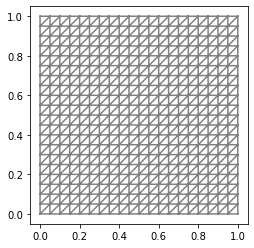

In [66]:
def q(u):
    return 1+u**2

def boundary(x, on_boundary):
    return on_boundary

x, y = sym.symbols('x[0], x[1]')
u = 1 + x + 2*y
f = -sym.diff(q(u)*sym.diff(u, x), x) - sym.diff(q(u)*sym.diff(u, y), y)
f = sym.simplify(f)

u_ccode = sym.printing.ccode(u)
f_ccode = sym.printing.ccode(f)

mesh = UnitSquareMesh(20, 20)
plot(mesh)
plt.show()

In [67]:
V = FunctionSpace(mesh, 'P', 1)

u_D = Expression(u_ccode, degree=2)
bc = DirichletBC(V, u_D, boundary)

In [68]:
u = Function(V)
v = TestFunction(V)
f = Expression(f_ccode, degree=1)
F = q(u)*dot(grad(u), grad(v))*dx - f*v*dx

In [69]:
solve(F == 0, u, bc)

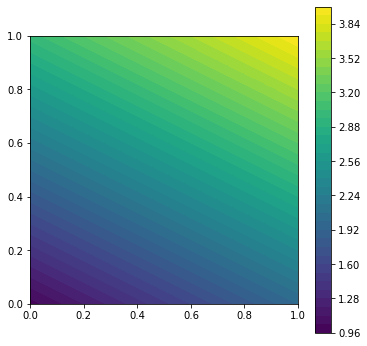

In [71]:
# Plot solution
plt.figure(figsize=(6,6))
u_plot = plot(u)
u_plot.set_cmap('viridis')
plt.colorbar(u_plot)
plt.savefig('results/u.pdf')
plt.show()


# Save solution to file
vtkfile_w = File('results/u.pvd')
vtkfile_w << u